C:\Users\Loren\AppData\Local\Temp\ipykernel_17632\3242192147.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Pastel1', len(pieces))


Directorio de resultados creado en: 'Resultados_Agujero_Central\2025-08-13_8'
Imagen guardada en: 'Resultados_Agujero_Central\2025-08-13_8\5_piezas_colocadas.png'
Coordenadas guardadas en: 'Resultados_Agujero_Central\2025-08-13_8\5_piezas_colocadas.txt'


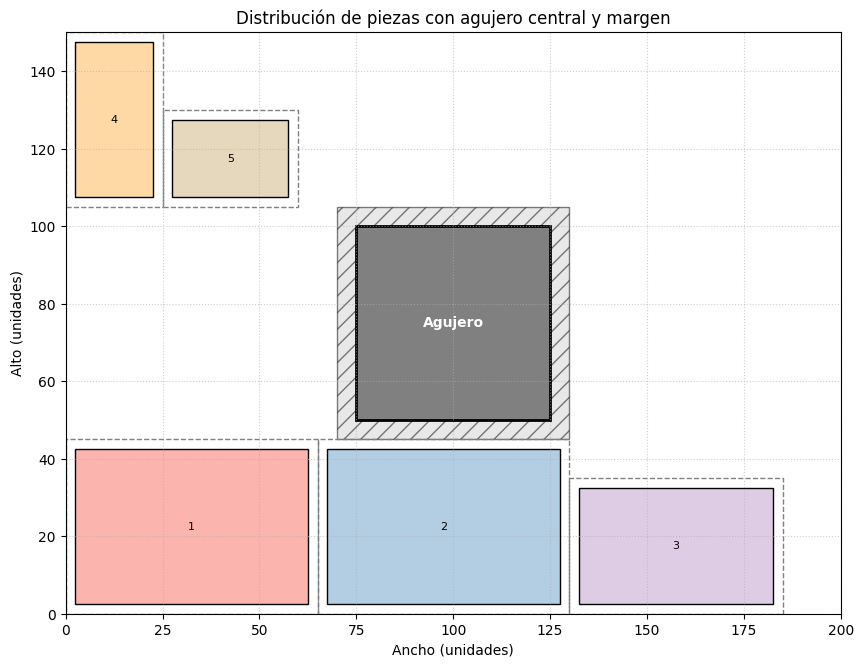


Coordenadas de las cajas con margen (x, y, ancho, alto):
Caja 1: x=0, y=0, w=65, h=45
Caja 2: x=65, y=0, w=65, h=45
Caja 3: x=130, y=0, w=55, h=35
Caja 4: x=0, y=105, w=25, h=45
Caja 5: x=25, y=105, w=35, h=25


In [ ]:
import matplotlib.pyplot as plt
from rectpack import newPacker, MaxRectsBssf, GuillotineBafSas
import os
from datetime import datetime

# ----------------------------
# FUNCIÓN PARA GUARDAR RESULTADOS (AÑADIDA)
# ----------------------------
def crear_directorio_resultados():
    """
    Crea un directorio único para guardar los resultados con fecha y contador.
    """
    fecha_hoy = datetime.now().strftime('%Y-%m-%d')
    base_dir = "Resultados_Agujero_Central"
    
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)

    contador = 1
    while True:
        nombre_carpeta = f"{fecha_hoy}_{contador}"
        ruta_completa = os.path.join(base_dir, nombre_carpeta)
        if not os.path.exists(ruta_completa):
            os.makedirs(ruta_completa)
            print(f"Directorio de resultados creado en: '{ruta_completa}'")
            return ruta_completa
        contador += 1

# ----------------------------
# Definición de piezas
# ----------------------------
pieces = [
    (40, 60), (50, 30), (60, 40), (30, 20),
    (80, 50), (20, 40), (80, 50),
]

margin = 5
# Se añade el margen a cada pieza. El packer trabajará con estas dimensiones.
pieces_with_margin = [(w + margin, h + margin) for w, h in pieces]

# Ordenar por área descendente (prioridad)
pieces_sorted = sorted(pieces_with_margin, key=lambda x: x[0]*x[1], reverse=True)

# ----------------------------
# Definición del contenedor y agujero con margen adicional
# ----------------------------
container_width = 200
container_height = 150

# Agujero central
hole_x, hole_y = 75, 50  # esquina inferior izquierda del agujero
hole_w, hole_h = 50, 50

hole_margin = 5  # margen extra de seguridad alrededor del agujero

# Expandir agujero para el margen
hx = hole_x - hole_margin
hy = hole_y - hole_margin
hw = hole_w + 2 * hole_margin
hh = hole_h + 2 * hole_margin

# ----------------------------
# Sub-bins alrededor del agujero con margen
# ----------------------------
sub_bins = []
sub_bin_positions = []

# Abajo
if hy > 0:
    sub_bins.append((container_width, hy))
    sub_bin_positions.append((0, 0))
# Arriba
if container_height - (hy + hh) > 0:
    sub_bins.append((container_width, container_height - (hy + hh)))
    sub_bin_positions.append((0, hy + hh))
# Izquierda
if hx > 0:
    sub_bins.append((hx, hh))
    sub_bin_positions.append((0, hy))
# Derecha
if container_width - (hx + hw) > 0:
    sub_bins.append((container_width - (hx + hw), hh))
    sub_bin_positions.append((hx + hw, hy))
packer = newPacker(pack_algo=GuillotineBafSas, rotation=True)
for rect in pieces_sorted:
    packer.add_rect(*rect)
for w, h in sub_bins:
    if w > 0 and h > 0:
        packer.add_bin(w, h)
packer.pack()
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.get_cmap('Pastel1', len(pieces))
coordenadas_finales = []
ax.add_patch(plt.Rectangle((hx, hy), hw, hh, facecolor='lightgray', edgecolor='black', lw=1, alpha=0.5, hatch='//'))
ax.add_patch(plt.Rectangle((hole_x, hole_y), hole_w, hole_h, facecolor='gray', edgecolor='black', lw=2))
ax.text(hole_x + hole_w/2, hole_y + hole_h/2, "Agujero", ha='center', va='center', color='white', weight='bold')
piece_idx = 0
for bin_idx, abin in enumerate(packer):
    bin_x, bin_y = sub_bin_positions[bin_idx]
    for rect in abin:
        x_margin, y_margin, w_margin, h_margin = rect.x + bin_x, rect.y + bin_y, rect.width, rect.height
        piece_w = w_margin - margin
        piece_h = h_margin - margin
        piece_x = x_margin + margin / 2
        piece_y = y_margin + margin / 2
        coordenadas_finales.append({
            "pieza": piece_idx + 1, "x": piece_x, "y": piece_y,
            "ancho": piece_w, "alto": piece_h
        })
        ax.add_patch(plt.Rectangle((x_margin, y_margin), w_margin, h_margin,
                                     facecolor='none', edgecolor='gray', lw=1, linestyle='--'))
        ax.add_patch(plt.Rectangle((piece_x, piece_y), piece_w, piece_h,
                                     facecolor=colors(piece_idx), edgecolor='black', lw=1))
        ax.text(piece_x + piece_w/2, piece_y + piece_h/2, f'{piece_idx+1}', 
                ha='center', va='center', fontsize=8, color='black')
        
        piece_idx += 1
ax.set_xlim(0, container_width)
ax.set_ylim(0, container_height)
ax.set_aspect('equal', adjustable='box')
ax.set_title("Distribución de piezas con agujero central y margen")
plt.xlabel("Ancho (unidades)")
plt.ylabel("Alto (unidades)")
plt.grid(True, linestyle=':', alpha=0.6)

directorio_salida = crear_directorio_resultados()

num_piezas_colocadas = len(coordenadas_finales)
nombre_base = f"{num_piezas_colocadas}_piezas_colocadas"
ruta_imagen = os.path.join(directorio_salida, f"{nombre_base}.png")
ruta_coordenadas = os.path.join(directorio_salida, f"{nombre_base}.txt")

# Guardar la imagen del gráfico
plt.savefig(ruta_imagen, dpi=300, bbox_inches='tight')
print(f"Imagen guardada en: '{ruta_imagen}'")

# Guardar las coordenadas en un archivo de texto
with open(ruta_coordenadas, 'w', encoding='utf-8') as f:
    f.write(f"Resultados del empaquetado - {num_piezas_colocadas} piezas colocadas\n")
    f.write(f"Dimensiones del contenedor: {container_width}x{container_height}\n")
    f.write(f"Margen aplicado a cada pieza: {margin}\n")
    f.write(f"Agujero en (x,y,w,h): ({hole_x}, {hole_y}, {hole_w}, {hole_h})\n")
    f.write("-" * 60 + "\n")
    f.write("Formato: Pieza N: x={x}, y={y}, ancho={ancho}, alto={alto}\n")
    f.write("-" * 60 + "\n")
    for p in coordenadas_finales:
        f.write(f"Pieza {p['pieza']:<3}: x={p['x']:.2f}, y={p['y']:.2f}, w={p['ancho']:.2f}, h={p['alto']:.2f}\n")
print(f"Coordenadas guardadas en: '{ruta_coordenadas}'")

# Muestra el gráfico en pantalla
plt.show()

# Imprimir coordenadas en consola (como en el script original)
print("\nCoordenadas de las cajas con margen (x, y, ancho, alto):")
idx = 0
for bin_idx, abin in enumerate(packer):
    bin_x, bin_y = sub_bin_positions[bin_idx]
    for rect in abin:
        x, y, w, h = rect.x + bin_x, rect.y + bin_y, rect.width, rect.height
        print(f"Caja {idx+1}: x={x}, y={y}, w={w}, h={h}")
        idx += 1

C:\Users\alberto.campuzano\AppData\Local\Temp\ipykernel_15456\526963412.py:109: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Pastel1', len(pieces))


Directorio de resultados creado en: 'Resultados_Agujero_Central\2025-08-13_3'
Imagen guardada en: 'Resultados_Agujero_Central\2025-08-13_3\9_piezas_colocadas.png'
Coordenadas guardadas en: 'Resultados_Agujero_Central\2025-08-13_3\9_piezas_colocadas.txt'


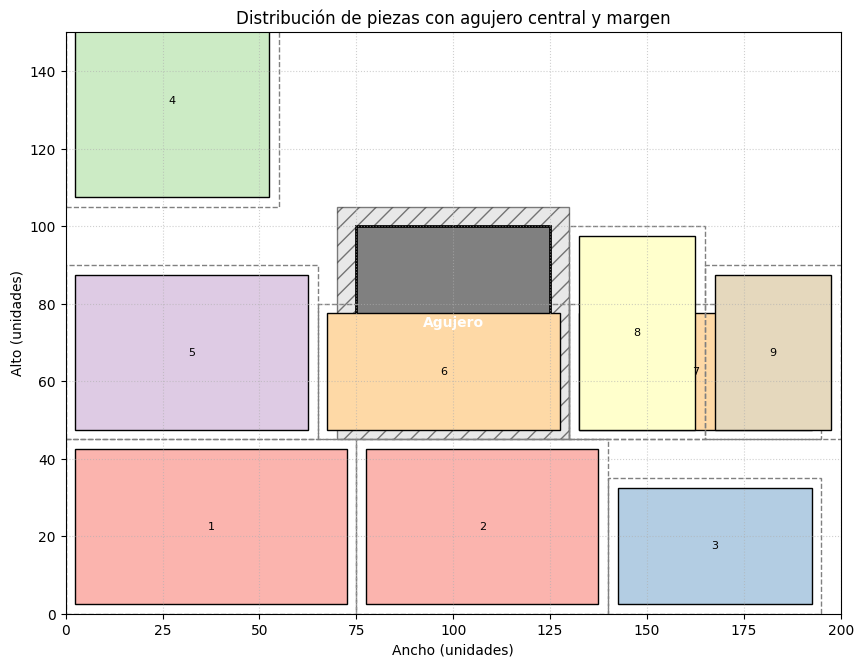


Coordenadas de las cajas con margen (x, y, ancho, alto):
Caja 1: x=0, y=0, w=75, h=45
Caja 2: x=75, y=0, w=65, h=45
Caja 3: x=140, y=0, w=55, h=35
Caja 4: x=0, y=105, w=55, h=55
Caja 5: x=0, y=45, w=65, h=45
Caja 6: x=65, y=45, w=65, h=35
Caja 7: x=130, y=45, w=65, h=35
Caja 8: x=130, y=45, w=35, h=55
Caja 9: x=165, y=45, w=35, h=45


In [ ]:
# !pip install rectpack matplotlib

import matplotlib.pyplot as plt
from rectpack import newPacker, MaxRectsBssf, GuillotineBafSas
import os
from datetime import datetime

# ----------------------------
# FUNCIÓN PARA GUARDAR RESULTADOS (AÑADIDA)
# ----------------------------
def crear_directorio_resultados():
    """
    Crea un directorio único para guardar los resultados con fecha y contador.
    """
    fecha_hoy = datetime.now().strftime('%Y-%m-%d')
    base_dir = "Resultados_Agujero_Central"
    
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)

    contador = 1
    while True:
        nombre_carpeta = f"{fecha_hoy}_{contador}"
        ruta_completa = os.path.join(base_dir, nombre_carpeta)
        if not os.path.exists(ruta_completa):
            os.makedirs(ruta_completa)
            print(f"Directorio de resultados creado en: '{ruta_completa}'")
            return ruta_completa
        contador += 1

# ----------------------------
# Definición de piezas
# ----------------------------
pieces = [
    (40, 60), (50, 30), (60, 40), (30, 20),
    (80, 50), (20, 40), (50, 50), (30, 60),
    (40, 30), (70, 40), (60, 30), (30, 50),
]

margin = 5
# Se añade el margen a cada pieza. El packer trabajará con estas dimensiones.
pieces_with_margin = [(w + margin, h + margin) for w, h in pieces]

# Ordenar por área descendente (prioridad)
pieces_sorted = sorted(pieces_with_margin, key=lambda x: x[0]*x[1], reverse=True)

# ----------------------------
# Definición del contenedor y agujero con margen adicional
# ----------------------------
container_width = 200
container_height = 150

# Agujero central
hole_x, hole_y = 75, 50  # esquina inferior izquierda del agujero
hole_w, hole_h = 50, 50

hole_margin = 5  # margen extra de seguridad alrededor del agujero

# Expandir agujero para el margen
hx = hole_x - hole_margin
hy = hole_y - hole_margin
hw = hole_w + 2 * hole_margin
hh = hole_h + 2 * hole_margin

# ----------------------------
# Sub-bins alrededor del agujero con margen
# ----------------------------
sub_bins = []
sub_bin_positions = []

# Abajo
if hy > 0:
    sub_bins.append((container_width, hy))
    sub_bin_positions.append((0, 0))
# Arriba
if container_height - (hy + hh) > 0:
    sub_bins.append((container_width, container_height - (hy + hh)))
    sub_bin_positions.append((0, hy + hh))
# Izquierda
if hx > 0:
    sub_bins.append((hx, hh))
    sub_bin_positions.append((0, hy))
# Derecha
if container_width - (hx + hw) > 0:
    sub_bins.append((container_width - (hx + hw), hh))
    sub_bin_positions.append((hx + hw, hy))

# ----------------------------
# Configuración del packer
# ----------------------------
packer = newPacker(pack_algo=GuillotineBafSas, rotation=True)

# Añadir piezas
for rect in pieces_sorted:
    packer.add_rect(*rect)

# Añadir sub-bins
for w, h in sub_bins:
    if w > 0 and h > 0:
        packer.add_bin(w, h)

# Ejecutar packing
packer.pack()

# ----------------------------
# Preparar datos para visualización y guardado
# ----------------------------
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.get_cmap('Pastel1', len(pieces))

# Lista para guardar las coordenadas finales de las piezas reales (sin margen)
coordenadas_finales = []

# Dibujar agujero con margen de seguridad
ax.add_patch(plt.Rectangle((hx, hy), hw, hh, facecolor='lightgray', edgecolor='black', lw=1, alpha=0.5, hatch='//'))
ax.add_patch(plt.Rectangle((hole_x, hole_y), hole_w, hole_h, facecolor='gray', edgecolor='black', lw=2))
ax.text(hole_x + hole_w/2, hole_y + hole_h/2, "Agujero", ha='center', va='center', color='white', weight='bold')

# Dibujar piezas en sub-bins y recolectar datos
piece_idx = 0
for bin_idx, abin in enumerate(packer):
    bin_x, bin_y = sub_bin_positions[bin_idx]
    for rect in abin:
        # Coordenadas del recuadro con margen (devueltas por el packer)
        x_margin, y_margin, w_margin, h_margin = rect.x + bin_x, rect.y + bin_y, rect.width, rect.height
        
        # Calcular coordenadas de la pieza real (descontando el margen)
        piece_w = w_margin - margin
        piece_h = h_margin - margin
        # Para centrar la pieza, sumamos la mitad del margen
        piece_x = x_margin + margin / 2
        piece_y = y_margin + margin / 2
        
        # Guardar coordenadas para el archivo de texto
        coordenadas_finales.append({
            "pieza": piece_idx + 1, "x": piece_x, "y": piece_y,
            "ancho": piece_w, "alto": piece_h
        })
        
        # Dibujar el espacio con margen (línea discontinua)
        ax.add_patch(plt.Rectangle((x_margin, y_margin), w_margin, h_margin,
                                     facecolor='none', edgecolor='gray', lw=1, linestyle='--'))
        
        # Dibujar la pieza real
        ax.add_patch(plt.Rectangle((piece_x, piece_y), piece_w, piece_h,
                                     facecolor=colors(piece_idx), edgecolor='black', lw=1))
        
        # Etiqueta de la pieza
        ax.text(piece_x + piece_w/2, piece_y + piece_h/2, f'{piece_idx+1}', 
                ha='center', va='center', fontsize=8, color='black')
        
        piece_idx += 1

# ----------------------------
# Configuración final del gráfico y guardado
# ----------------------------
ax.set_xlim(0, container_width)
ax.set_ylim(0, container_height)
ax.set_aspect('equal', adjustable='box')
ax.set_title("Distribución de piezas con agujero central y margen")
plt.xlabel("Ancho (unidades)")
plt.ylabel("Alto (unidades)")
plt.grid(True, linestyle=':', alpha=0.6)

# --- INICIO DE LA LÓGICA DE GUARDADO ---
directorio_salida = crear_directorio_resultados()

num_piezas_colocadas = len(coordenadas_finales)
nombre_base = f"{num_piezas_colocadas}_piezas_colocadas"
ruta_imagen = os.path.join(directorio_salida, f"{nombre_base}.png")
ruta_coordenadas = os.path.join(directorio_salida, f"{nombre_base}.txt")

# Guardar la imagen del gráfico
plt.savefig(ruta_imagen, dpi=300, bbox_inches='tight')
print(f"Imagen guardada en: '{ruta_imagen}'")

# Guardar las coordenadas en un archivo de texto
with open(ruta_coordenadas, 'w', encoding='utf-8') as f:
    f.write(f"Resultados del empaquetado - {num_piezas_colocadas} piezas colocadas\n")
    f.write(f"Dimensiones del contenedor: {container_width}x{container_height}\n")
    f.write(f"Margen aplicado a cada pieza: {margin}\n")
    f.write(f"Agujero en (x,y,w,h): ({hole_x}, {hole_y}, {hole_w}, {hole_h})\n")
    f.write("-" * 60 + "\n")
    f.write("Formato: Pieza N: x={x}, y={y}, ancho={ancho}, alto={alto}\n")
    f.write("-" * 60 + "\n")
    for p in coordenadas_finales:
        f.write(f"Pieza {p['pieza']:<3}: x={p['x']:.2f}, y={p['y']:.2f}, w={p['ancho']:.2f}, h={p['alto']:.2f}\n")
print(f"Coordenadas guardadas en: '{ruta_coordenadas}'")
# --- FIN DE LA LÓGICA DE GUARDADO ---

# Muestra el gráfico en pantalla
plt.show()

# Imprimir coordenadas en consola (como en el script original)
print("Coordenadas de las cajas con margen (x, y, ancho, alto):")
idx = 0
for bin_idx, abin in enumerate(packer):
    bin_x, bin_y = sub_bin_positions[bin_idx]
    for rect in abin:
        x, y, w, h = rect.x + bin_x, rect.y + bin_y, rect.width, rect.height
        print(f"Caja {idx+1}: x={x}, y={y}, w={w}, h={h}")
        idx += 1